In [2]:
import pandas as pd
import numpy as np

In [3]:
#Importing csv that needs NA filling
df1_zero = pd.read_csv('fillna.csv')

IOError: [Errno 2] File fillna.csv does not exist: 'fillna.csv'

In [ ]:
df1_zero.isna().sum()

In [4]:
df1_zero.fillna(0, inplace=True)
df1_zero.to_csv('fillnazero.csv')

NameError: name 'df1_zero' is not defined

In [5]:
#Filling values with mean
df1_null = pd.read_csv('fillna.csv')
df1_null.isna().sum()

IOError: [Errno 2] File fillna.csv does not exist: 'fillna.csv'

In [6]:
df1_null['DEW'] = df1_null['DEW'].replace(np.NaN, df1_null['DEW'].mean())
df1_null['TMP'] = df1_null['TMP'].replace(np.NaN, df1_null['TMP'].mean())
df1_null['DIR'] = df1_null['DIR'].replace(np.NaN, df1_null['DIR'].mean())
df1_null['SPD'] = df1_null['SPD'].replace(np.NaN, df1_null['SPD'].mean())
df1_null['HUM'] = df1_null['HUM'].replace(np.NaN, df1_null['HUM'].mean())
df1_null['NO2'] = df1_null['NO2'].replace(np.NaN, df1_null['NO2'].mean())
df1_null['O3']  = df1_null['O3'].replace(np.NaN, df1_null['O3'].mean())
df1_null['PM25'] = df1_null['PM25'].replace(np.NaN, df1_null['PM25'].mean())

NameError: name 'df1_null' is not defined

In [7]:
df1_null.isna().sum()
df1_null.to_csv('fillnamean.csv',index=False)

NameError: name 'df1_null' is not defined

In [8]:
#Filling the values with forfward fill - Fill with previous values.
df_lat = pd.read_csv('fillna.csv')

df_lat = df_lat.fillna(method='ffill',limit=10)
df_lat.isna().sum()

df1_null = df_lat
df1_null['DEW'] = df1_null['DEW'].replace(np.NaN, df1_null['DEW'].mean())
df1_null['TMP'] = df1_null['TMP'].replace(np.NaN, df1_null['TMP'].mean())
df1_null['DIR'] = df1_null['DIR'].replace(np.NaN, df1_null['DIR'].mean())
df1_null['SPD'] = df1_null['SPD'].replace(np.NaN, df1_null['SPD'].mean())
df1_null['HUM'] = df1_null['HUM'].replace(np.NaN, df1_null['HUM'].mean())
df1_null['NO2'] = df1_null['NO2'].replace(np.NaN, df1_null['NO2'].mean())
df1_null['O3']  = df1_null['O3'].replace(np.NaN, df1_null['O3'].mean())
df1_null['PM25'] = df1_null['PM25'].replace(np.NaN, df1_null['PM25'].mean())
df_lat = df1_null
df_lat.isna().sum()
df_lat.to_csv('fillnalatest.csv',index=False)

IOError: [Errno 2] File fillna.csv does not exist: 'fillna.csv'

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


df5 = pd.read_csv('fillna.csv')
df5 = df5.fillna(0)
df5.isna().sum()


plt.figure(figsize=(15,8))
sns.distplot(df5.TMP, bins =30)

IOError: [Errno 2] File fillna.csv does not exist: 'fillna.csv'

,Total,Percent
PM25,2808,0.160274
DIR,963,0.054966
O3,761,0.043436
NO2,376,0.021461
SPD,300,0.017123


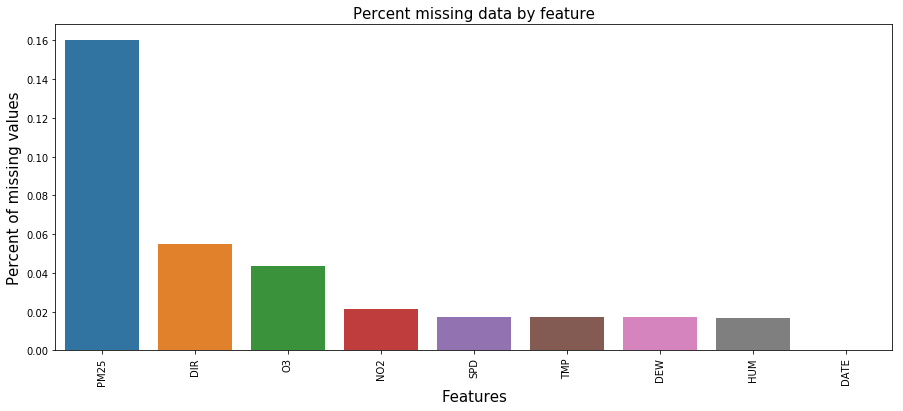

In [12]:
cdata_out = pd.read_csv('vis/weather-pollution-no-outliers.csv')
dataset = cdata_out
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()